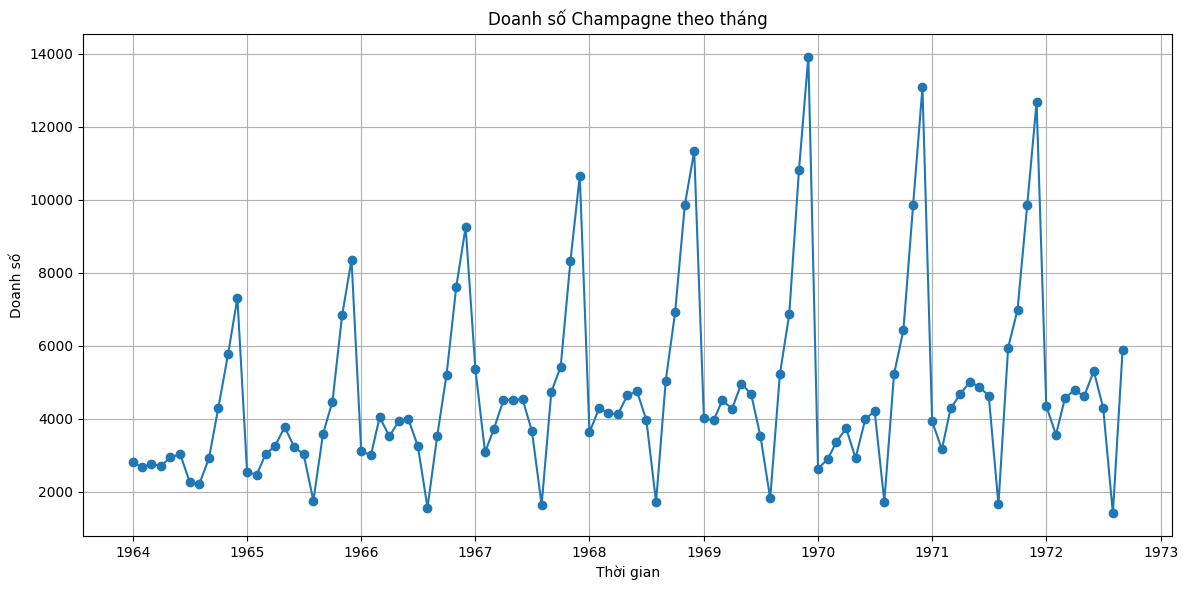

In [7]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

# Đọc dữ liệu
file_path = "/content/champagne.csv"
df = pd.read_csv(file_path)

# Tiền xử lý dữ liệu
df['Month'] = pd.to_datetime(df['Month'])  # Chuyển cột thời gian
df.set_index('Month', inplace=True)        # Đặt chỉ mục thời gian
df = df.asfreq('MS')                       # Đặt tần suất theo tháng

# Vẽ biểu đồ chuỗi thời gian gốc
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], marker='o')
plt.title("Doanh số Champagne theo tháng")
plt.xlabel("Thời gian")
plt.ylabel("Doanh số")
plt.grid(True)
plt.tight_layout()
plt.show()


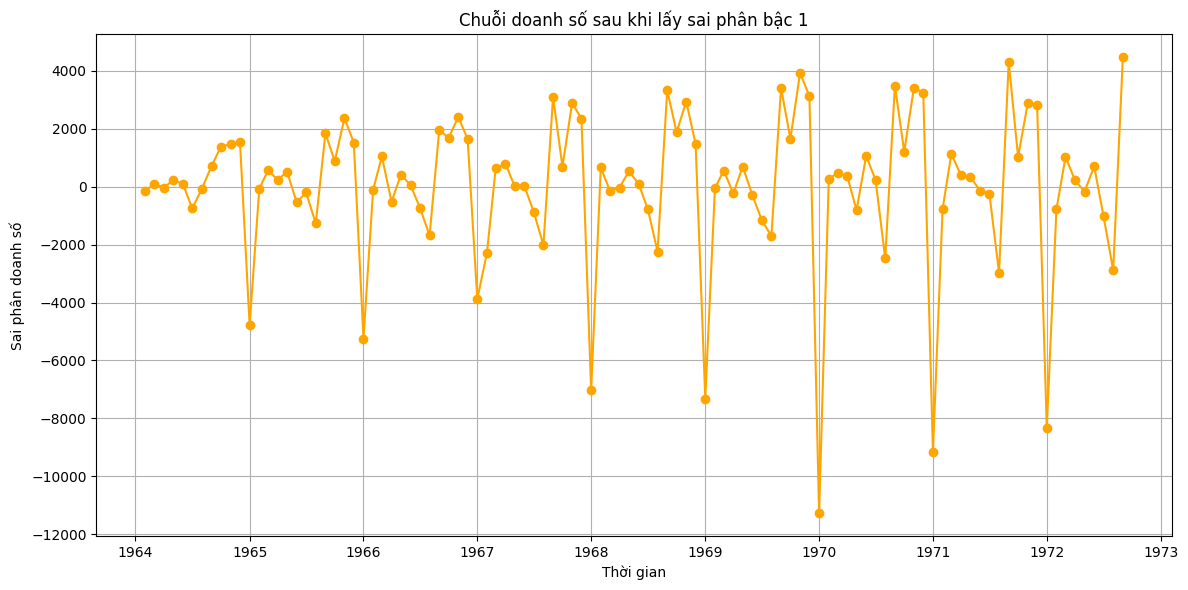

In [8]:
# Lấy sai phân bậc 1 để loại bỏ xu hướng
df_diff = df.diff().dropna()

# Vẽ chuỗi sau khi lấy sai phân
plt.figure(figsize=(12, 6))
plt.plot(df_diff['Sales'], color='orange', marker='o')
plt.title("Chuỗi doanh số sau khi lấy sai phân bậc 1")
plt.xlabel("Thời gian")
plt.ylabel("Sai phân doanh số")
plt.grid(True)
plt.tight_layout()
plt.show()


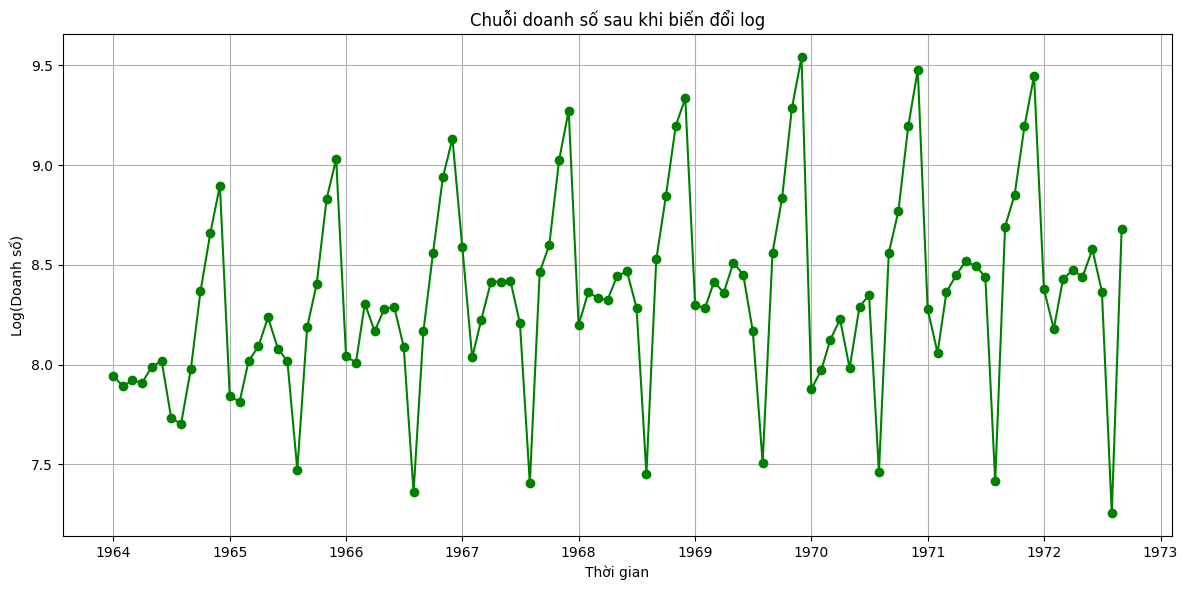

In [9]:
# Biến đổi log để làm giảm phương sai và ổn định chuỗi
df_log = np.log(df['Sales'])

# Vẽ biểu đồ chuỗi sau khi biến đổi log
plt.figure(figsize=(12, 6))
plt.plot(df_log, marker='o', color='green')
plt.title("Chuỗi doanh số sau khi biến đổi log")
plt.xlabel("Thời gian")
plt.ylabel("Log(Doanh số)")
plt.grid(True)
plt.tight_layout()
plt.show()


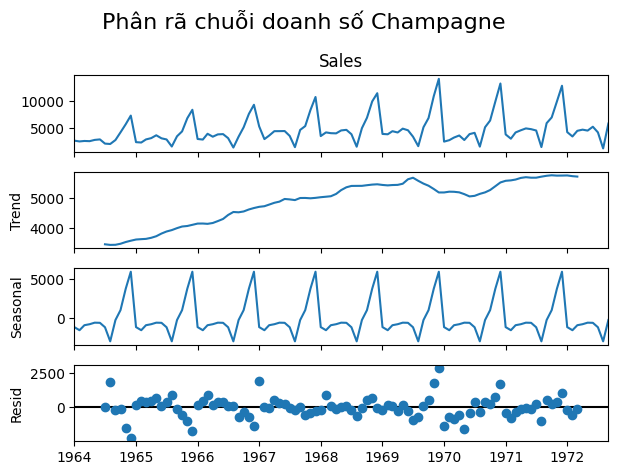

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân rã chuỗi theo mô hình cộng (additive)
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Vẽ kết quả phân rã
decomposition.plot()
plt.suptitle("Phân rã chuỗi doanh số Champagne", fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Dùng chuỗi log đã lấy sai phân bậc 1 để xây dựng mô hình ARIMA
# Tính log và sai phân log
df_log = np.log(df['Sales'])
df_log_diff = df_log.diff().dropna()

# Xây dựng mô hình ARIMA(p=1, d=1, q=1) làm ví dụ
model = ARIMA(df_log, order=(1, 1, 1))
model_fit = model.fit()

# In tóm tắt mô hình
model_summary = model_fit.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -64.071
Date:                Tue, 03 Jun 2025   AIC                            134.143
Time:                        11:05:30   BIC                            142.076
Sample:                    01-01-1964   HQIC                           137.357
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3758      0.087      4.329      0.000       0.206       0.546
ma.L1         -0.9654      0.040    -24.026      0.000      -1.044      -0.887
sigma2         0.1970      0.031      6.401      0.000       0.137       0.257
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.60   Prob(JB):                         0.10
Heteroskedasticity (H):               2.09   Skew:                            -0.51
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Dự báo 12 tháng tiếp theo (log scale)
forecast_log = model_fit.forecast(steps=12)

# Biến đổi ngược lại từ log → giá trị thực
forecast = np.exp(forecast_log)

print(forecast)


1972-10-01    5031.001243
1972-11-01    4745.563010
1972-12-01    4642.533612
1973-01-01    4604.396493
1973-02-01    4590.145857
1973-03-01    4584.801939
1973-04-01    4582.795327
1973-05-01    4582.041478
1973-06-01    4581.758217
1973-07-01    4581.651773
1973-08-01    4581.611773
1973-09-01    4581.596741
Freq: MS, Name: predicted_mean, dtype: float64
